In [97]:
!pip install pandas numpy matplotlib


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [99]:
df = pd.read_csv("auto-mpg.csv")
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [100]:
df = df.dropna()
numeric_cols = df.select_dtypes(include=np.number).columns
X = df[numeric_cols]


In [101]:
target_car = df[df['car name'] == 'toyota corona mark ii']
target_vector = target_car[numeric_cols].values[0]
target_vector


array([  24.,    4.,  113., 2372.,   15.,   70.,    3.])

question 1

In [102]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


In [103]:
df['similarity'] = X.apply(
    lambda row: cosine_similarity(row.values, target_vector),
    axis=1
)

top_5_similar = df.sort_values('similarity', ascending=False).iloc[1:6][
    ['car name', 'similarity']
]

print("Top 5 Similar Cars:")
print(top_5_similar)


Top 5 Similar Cars:
                        car name  similarity
149                  honda civic    1.000000
173                   datsun 710    0.999999
82   toyouta corona mark ii (sw)    0.999999
77           volkswagen 411 (sw)    0.999998
318       toyota corona liftback    0.999998


question 2

In [104]:
orthogonal_car = df.sort_values('similarity').iloc[0][
    ['car name', 'similarity']
]

print("\nMost Orthogonal Car:")
print(orthogonal_car)




Most Orthogonal Car:
car name      buick estate wagon (sw)
similarity                   0.995083
Name: 13, dtype: object


question 3

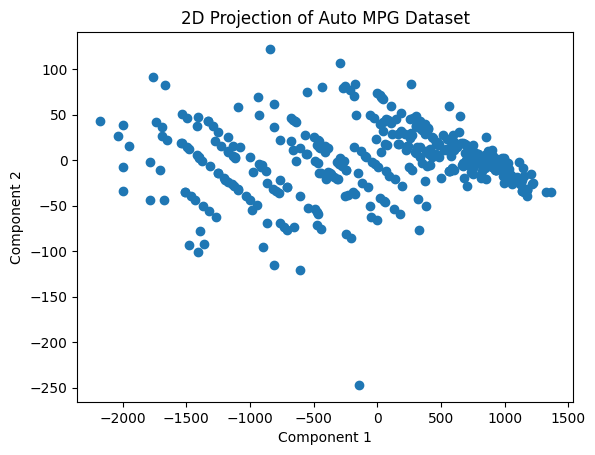

In [105]:
X_centered = X - X.mean()
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
X_2D = U[:, :2] @ np.diag(S[:2])

plt.scatter(X_2D[:,0], X_2D[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("2D Projection of Auto MPG Dataset")
plt.show()


question 4

In [106]:
def dot_product(a, b):
    return sum(x*y for x,y in zip(a,b))

dot_product([1,2,3], [4,5,6])


32

question 5

In [110]:
def projection(a, b):
    a = np.array(a)
    b = np.array(b)
    return (np.dot(a,b)/np.dot(b,b))*b

print("projection of b on a:",projection([3,4], [1,0]))


projection of b on a: [3. 0.]


question 6

In [108]:
class Vector:
    def __init__(self, data):
        self.data = np.array(data)

    def __add__(self, other):
        return Vector(self.data + other.data)

    def dot(self, other):
        return np.dot(self.data, other.data)

    def magnitude(self):
        return np.linalg.norm(self.data)

v1 = Vector([1,2,3])
v2 = Vector([4,5,6])

print("addition is:",(v1+v2).data,"dot product  is:", v1.dot(v2), "magnitude is:",v1.magnitude())


addition is: [5 7 9] dot product  is: 32 magnitude is: 3.7416573867739413


question 7


In [109]:


def norms(v):
    v = np.array(v)

    L1 = int(np.sum(np.abs(v)))      # L1 norm
    L2 = float(np.linalg.norm(v))    # L2 norm

    return L1, L2

# Input vector
vector = [3, -4, 5]

# Compute norms
L1, L2 = norms(vector)

# Display output clearly
print("Vector:", vector)
print("L1 norm =", L1)
print("L2 norm =", L2)



Vector: [3, -4, 5]
L1 norm = 12
L2 norm = 7.0710678118654755
